In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

from sklearn.cross_validation import train_test_split

resp = pd.read_csv('../project/data/resp.csv', index_col=0)

## KNN

In [2]:
features = resp[['exercise', 'bmi', 'cat_occ']]
response = resp.income_lvl

X_train, X_test, y_train, y_test = train_test_split(features, response, random_state=1)

In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.76896551724137929

In [4]:
cross_val_score(knn, X_test, y_test, cv=4, scoring='accuracy').mean()

/Users/FrancescaSchott/anaconda/envs/testenv/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=4.
  % (min_labels, self.n_folds)), Warning)


0.79669110553733358

In [5]:
# k_range = range(1, 30, 2)
# scores = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores.append(np.mean(cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy')))
# scores

In [9]:
from sklearn.preprocessing import scale

sX_train_knn = scale(X_train)
sX_test_knn = scale(X_test)


knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(sX_train_knn, y_train)

knn_scaled.score(sX_test_knn, y_test)

0.76206896551724135

In [7]:
cross_val_score(knn_scaled, sX_test_knn, y_test, cv=5, scoring='accuracy').mean()

/Users/FrancescaSchott/anaconda/envs/testenv/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


0.752001614205004

In [8]:
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(sX_train_knn, y_train)

knn_scaled.score(sX_test_knn, y_test)

0.76206896551724135

In [74]:
k_range = range(1, 60, 2)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, sX_test_knn, y_test, cv=5, scoring='accuracy')))
scores

[0.69404358353510898,
 0.752001614205004,
 0.77264729620661821,
 0.77264729620661821,
 0.79668280871670694,
 0.80727199354317991,
 0.80727199354317991,
 0.81060532687651321,
 0.81417675544794188,
 0.81078692493946725,
 0.81078692493946725,
 0.81078692493946725,
 0.81435835351089592,
 0.81435835351089592,
 0.81435835351089592,
 0.81435835351089592,
 0.81435835351089592,
 0.81435835351089592,
 0.81435835351089592,
 0.81435835351089592,
 0.81435835351089592,
 0.81435835351089592,
 0.81435835351089592,
 0.81435835351089592,
 0.81435835351089592,
 0.81435835351089592,
 0.81435835351089592,
 0.81435835351089592,
 0.81435835351089592,
 0.81435835351089592]

In [75]:
# plt.figure()
# plt.plot(k_range, scores)

In [77]:
from sklearn.grid_search import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 29, 2)}
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(sX_train_knn, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

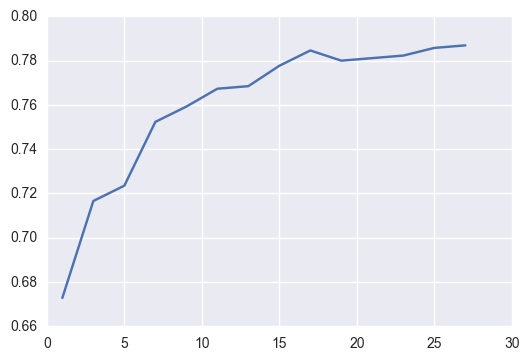

In [78]:
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(range(1, 29, 2), grid_mean_scores)

## Logistic Regression

In [281]:
features = resp[['exercise', 'food_amount', 'maj_ind', 'cat_occ']]
response = resp.income_lvl

X_train, X_test, y_train, y_test = train_test_split(features, response, random_state=1)

In [282]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg.score(X_test, y_test)


0.81034482758620685

In [283]:
cross_val_score(logreg, X_test, y_test, cv=5, scoring='accuracy').mean()

0.81435835351089592

In [284]:
1-y_test.mean()

-1.6965517241379309

In [285]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)
X_train_1 = X_train
X_test_1 = X_test
columns = ['food_amount', 'maj_ind']

for col in columns:
        # creating an exhaustive list of all possible categorical values
        data =X_train[[col]].append(X_test[[col]])
        enc.fit(data)
        # Fitting One Hot Encoding on train data
        temp = enc.transform(X_train[[col]])
        # Changing the encoded features into a data frame with new column names
        temp=pd.DataFrame(temp, columns = [(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
        # In side by side concatenation index values should be same
        # Setting the index values similar to the X_train data frame
        temp=temp.set_index(X_train.index.values)
        # adding the new One Hot Encoded varibales to the train data frame
        X_train_1=pd.concat([X_train_1,temp],axis=1)
        # fitting One Hot Encoding on test data
        temp = enc.transform(X_test[[col]])
        # changing it into data frame and adding column names
        temp=pd.DataFrame(temp, columns = [(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
        # Setting the index for proper concatenation
        temp=temp.set_index(X_test.index.values)
        # adding the new One Hot Encoded varibales to test data frame
        X_test_1=pd.concat([X_test_1,temp],axis=1)

In [286]:
# Standardizing the data set
X_train_scale = scale(X_train_1)
X_test_scale = scale(X_test_1)
# Fitting a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scale, y_train)

logreg.score(X_test_scale, y_test)

0.80000000000000004

In [287]:
cross_val_score(logreg, X_test_scale, y_test, cv=5, scoring='accuracy').mean()

0.80036723163841805

In [238]:
metrics.confusion_matrix(y_test, preds)

array([[  0,   3,   0,   0],
       [  0,  28,   0,   0],
       [  0,  23,   0,   0],
       [  0, 236,   0,   0]])

## Decision Tree

In [327]:
feature_cols = ['exercise', 'food_amount', 'maj_ind', 'cat_occ']
X = resp[feature_cols]
y = resp.income_lvl

In [328]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [329]:
treeclf.score(X, y)

0.79533678756476689

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [331]:
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [332]:
treeclf.score(X_test, y_test)

0.80344827586206902

In [333]:
export_graphviz(treeclf, out_file='tree3_atus_eh.dot', feature_names=feature_cols)


In [95]:
resp['prediction'] = resp.income_weekly.mean()
resp.head()

,bmi,primary_eating,secondary_eating,exercise,fast_food,food_amount,stores,maj_ind,cat_occ,income_lvl,income_weekly,prediction
7,27.500000,30.0,5.0,2.0,1.0,3.0,1.0,5,3,3.0,144.90,942.127955
34,30.600000,85.0,0.0,2.0,1.0,3.0,2.0,13,1,3.0,1038.46,942.127955
36,18.299999,145.0,0.0,2.0,1.0,3.0,1.0,10,1,3.0,884.61,942.127955
37,26.500000,60.0,5.0,2.0,2.0,3.0,1.0,12,2,1.0,415.00,942.127955
38,24.200001,15.0,0.0,1.0,1.0,3.0,1.0,8,1,3.0,576.92,942.127955


In [96]:
np.sqrt(metrics.mean_squared_error(resp.income_weekly, resp.prediction))

597.43793487654943

In [89]:
def feature_split(primary_eating):
    lower_earnings = resp[resp.primary_eating < primary_eating].income_weekly.mean()
    higher_earnings = resp[resp.primary_eating >= primary_eating].income_weekly.mean()
    resp['prediction'] = np.where(resp.primary_eating < primary_eating, lower_earnings, higher_earnings)
    return np.sqrt(metrics.mean_squared_error(resp.income_weekly, resp.prediction))

print 'RMSE:', feature_split (60)
resp.head()

RMSE: 596.381918872


,bmi,primary_eating,secondary_eating,exercise,fast_food,food_amount,stores,maj_ind,cat_occ,income_lvl,income_weekly,prediction
7,27.500000,30.0,5.0,2.0,1.0,3.0,1.0,5,3,3.0,144.90,908.764808
34,30.600000,85.0,0.0,2.0,1.0,3.0,2.0,13,1,3.0,1038.46,979.914944
36,18.299999,145.0,0.0,2.0,1.0,3.0,1.0,10,1,3.0,884.61,979.914944
37,26.500000,60.0,5.0,2.0,2.0,3.0,1.0,12,2,1.0,415.00,979.914944
38,24.200001,15.0,0.0,1.0,1.0,3.0,1.0,8,1,3.0,576.92,908.764808


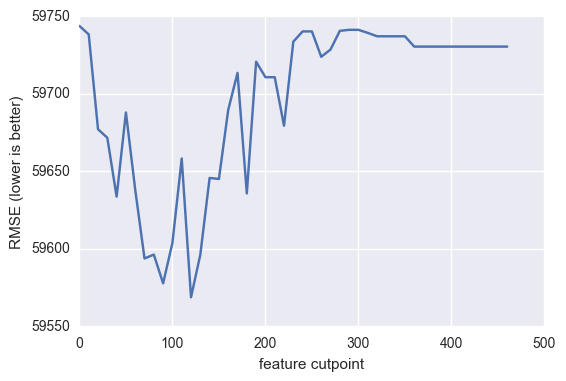

In [183]:
feature_range = range(int(resp.primary_eating.min()), int(resp.primary_eating.max()), 10)
RMSE = [feature_split(primary_eating) for primary_eating in feature_range]

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

plt.plot(feature_range, RMSE)
plt.xlabel('feature cutpoint')
plt.ylabel('RMSE (lower is better)')

In [184]:
print 'RMSE:', feature_split (120)

RMSE: 59568.7577004


In [185]:
feature_cols = ['food_amount', 'exercise', 'cat_occ', 'maj_ind']
X = resp[feature_cols]
y = resp.income_weekly


In [186]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)

from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=15, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

56407.569036996363

In [187]:
max_depth_range = range(1, 8)

RMSE_scores = []

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=15, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [188]:
RMSE_scores[0:7]

[55213.087541645349,
 54578.372810571454,
 54723.072021287204,
 55154.260720995517,
 55881.274893935224,
 55552.417933867895,
 55656.073460489824]

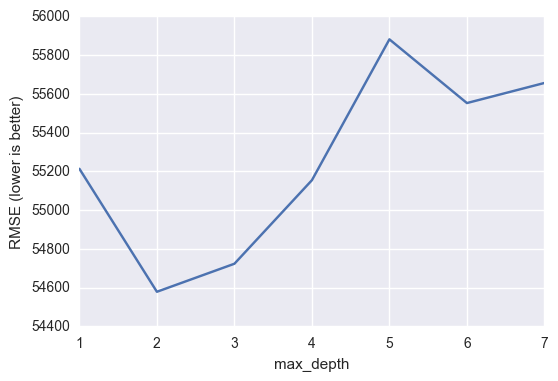

In [189]:
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [46]:
treereg = DecisionTreeRegressor(max_depth=10, random_state=1)
treereg.fit(X, y)

NameError: name 'X' is not defined

In [191]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,food_amount,0.030491
1,exercise,0.102579
2,cat_occ,0.813926
3,maj_ind,0.053005


In [120]:
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_atus_eh.dot', feature_names=feature_cols)


## Decision Tree 2

In [43]:
X_2 = resp.drop(['income_weekly', 'income_lvl', 'prediction'], axis=1)
y_2 = resp.income_weekly

from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(max_depth=10, random_state=1)
scores = cross_val_score(treereg, X_2, y_2, cv=5, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

70043.051036394289

In [44]:
treereg.fit(X_2, y_2)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [45]:
pd.DataFrame({'feature':X_2, 'importance':treereg.feature_importances_})

ValueError: cannot copy sequence with size 10 to array axis with dimension 1158

In [32]:

# from sklearn.tree import export_graphviz
# export_graphviz(treereg, out_file='tree2_atus_eh.dot', feature_names=X_2)

NotFittedError: Estimator not fitted, call `fit` before `feature_importances_`.

0.79274611398963735

In [122]:
resp_knn.describe()

,bmi,exercise,food_amount,cat_occ,income_lvl
count,1158.000000,1158.00000,1158.000000,1158.000000,1158.000000
mean,27.601093,1.66494,2.915371,2.370466,4.288428
std,5.867382,0.48128,0.371530,1.692443,1.385087
min,15.800000,0.00000,0.000000,1.000000,0.000000
25%,23.700001,1.00000,3.000000,1.000000,5.000000
50%,26.650001,2.00000,3.000000,2.000000,5.000000
75%,30.400000,2.00000,3.000000,3.000000,5.000000
max,58.400002,2.00000,3.000000,6.000000,5.000000


array([ 5.,  5.])

0.67271157167530227

0.78497409326424872

0.6908407157270815

array([ 5.,  5.])

NameError: name 'StandardScaler' is not defined

In [178]:
preds = logreg.predict(X_scaled)
print metrics.confusion_matrix(y, preds)

NotFittedError: This LogisticRegression instance is not fitted yet

## ROC-AUC

In [129]:
# X_sca_bi = s_log.fit_transform(X[['bmi']])

# cross_val_score(logreg, X_sca_bi, y, cv=5, scoring='roc_auc').mean()

In [84]:
resp_roc = resp

resp_roc.income_lvl.replace([1, 2, 3, 4, 5], [0, 0, 0, 0, 1], inplace=True)

resp.income_lvl.value_counts()

0.0    1158
Name: income_lvl, dtype: int64

In [75]:
X = resp_roc[['cat_occ']]
y = resp_roc.income_lvl

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
logreg.score(X_test, y_test)

0.76551724137931032

In [80]:
# preds = logreg.predict(X_test)
# from sklearn import metrics
# print metrics.accuracy_score(y_test, preds)

In [81]:
1-y_test.mean()


0.23448275862068968

In [73]:
print metrics.confusion_matrix(y_test, preds)

[[  0  68]
 [  0 222]]


(array([ 136.,   46.,    0.,   58.,    0.,    2.,    0.,   18.,    0.,   30.]),
 array([ 0.10036688,  0.11059949,  0.12083209,  0.1310647 ,  0.14129731,
         0.15152992,  0.16176253,  0.17199514,  0.18222774,  0.19246035,
         0.20269296]),
 <a list of 10 Patch objects>)

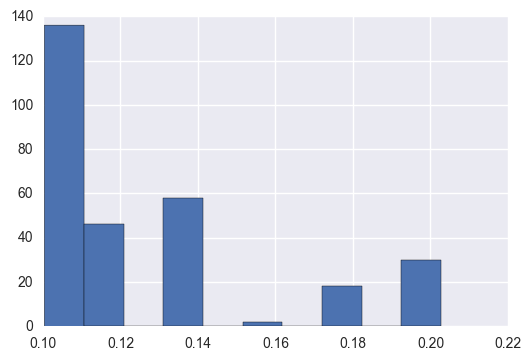

In [64]:
probs = logreg.predict_proba(X_test)[:, 1]
plt.hist(probs)

In [65]:
print metrics.accuracy_score(y_test, preds)
print 45 / float(34 + 45)
print 2340 / float(2340 + 81)

0.765517241379
0.569620253165
0.966542750929


In [66]:
print metrics.roc_auc_score(y_test, probs)

ValueError: multiclass format is not supported

## Clustering Income Lvl

In [294]:
resp_cluster = resp[['bmi', 'exercise', 'food_amount', 'cat_occ', 'income_lvl']]

X = resp_cluster.drop('income_lvl', axis=1)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, random_state=1)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [295]:
resp_cluster['cluster'] = km.labels_
resp_cluster.sort('cluster')

/Users/FrancescaSchott/anaconda/envs/testenv/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/FrancescaSchott/anaconda/envs/testenv/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,bmi,exercise,food_amount,cat_occ,income_lvl,cluster
7,27.500000,2.0,3.0,3,3.0,0
4646,25.100000,2.0,3.0,1,3.0,0
4670,27.299999,2.0,3.0,2,3.0,0
4710,25.400000,2.0,3.0,1,3.0,0
4719,28.700001,2.0,3.0,3,3.0,0
4736,28.299999,1.0,3.0,1,3.0,0
4760,25.799999,2.0,3.0,1,3.0,0
4771,27.400000,2.0,2.0,2,3.0,0
4642,28.200001,1.0,3.0,3,3.0,0
4815,28.100000,2.0,3.0,3,2.0,0


In [296]:
km.cluster_centers_

array([[ 26.72388032,   1.7010989 ,   2.87252747,   2.42197802],
       [ 37.76310702,   1.53398058,   2.96116505,   2.51456311],
       [ 21.98056335,   1.72112676,   2.95492958,   2.04225352],
       [ 49.95909105,   1.45454545,   2.81818182,   1.90909091],
       [ 31.43901341,   1.58295964,   2.92825112,   2.76681614]])

In [297]:
resp_cluster.groupby('cluster').mean()

,bmi,exercise,food_amount,cat_occ,income_lvl
cluster,,,,,
0,26.718565,1.699561,2.872807,2.423246,2.620614
1,37.763107,1.533981,2.961165,2.514563,2.650485
2,21.974011,1.723164,2.954802,2.039548,2.723164
3,49.959091,1.454545,2.818182,1.909091,2.545455
4,31.439013,1.582960,2.928251,2.766816,2.668161


In [298]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [299]:
km = KMeans(n_clusters=5, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [300]:
resp_cluster['cluster'] = km.labels_
resp_cluster.sort('cluster').head()

/Users/FrancescaSchott/anaconda/envs/testenv/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/FrancescaSchott/anaconda/envs/testenv/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,bmi,exercise,food_amount,cat_occ,income_lvl,cluster
7,27.5,2.0,3.0,3,3.0,0
4102,24.9,2.0,3.0,1,3.0,0
4105,19.0,2.0,3.0,3,3.0,0
7578,27.4,2.0,3.0,3,3.0,0
7576,23.9,2.0,3.0,3,3.0,0


In [301]:
resp_cluster.groupby('cluster').mean()

,bmi,exercise,food_amount,cat_occ,income_lvl
cluster,,,,,
0,25.362427,2.000000,3.000000,1.588339,2.777385
1,26.421391,0.991111,3.000000,1.888889,2.582222
2,28.230274,1.576923,3.000000,5.615385,2.598901
3,27.591042,1.469697,1.560606,2.772727,2.015152
4,39.522689,1.588235,2.974790,1.815126,2.722689


In [312]:
# plt.scatter(X_scaled.bmi, X_scaled.exercise, X_scaled.food_amount, X_scaled.cat_occ, c=colors[list(resp_cluster.cluster)], s=50)

# # cluster centers, marked by "+"
# plt.scatter(centers.bmi, centers.exercise, centers.food_amount, centers.cat_occ, linewidths=3, marker='+', s=300, c='black')

# # add labels
# plt.xlabel('calories')
# plt.ylabel('alcohol')

In [303]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, random_state=1)
km.fit(X)

km = KMeans(n_clusters=5, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

## Clustering Weekly Income

In [290]:
resp_cluster = resp[['bmi', 'exercise', 'food_amount', 'cat_occ', 'income_weekly']]

X = resp_cluster.drop('income_weekly', axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [293]:
resp_cluster['cluster'] = km.labels_
resp_cluster.groupby('cluster').mean()

/Users/FrancescaSchott/anaconda/envs/testenv/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,bmi,exercise,food_amount,cat_occ,income_weekly
cluster,,,,,
0,25.362427,2.000000,3.000000,1.588339,1087.134874
1,26.421391,0.991111,3.000000,1.888889,777.454688
2,28.230274,1.576923,3.000000,5.615385,826.682490
3,27.591042,1.469697,1.560606,2.772727,696.214057
4,39.522689,1.588235,2.974790,1.815126,876.741071


In [308]:
# import numpy as np
# colors = np.array(['red', 'green', 'blue', 'yellow', 'purple'])

# pd.scatter_matrix(X, c=colors[list(resp_cluster.cluster)], figsize=(10,10), s=100)

In [309]:
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.46189355687964617

In [310]:
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

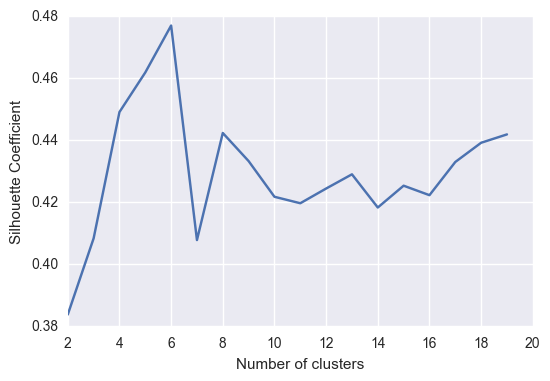

In [311]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

## Multinomial NB

In [41]:
features = resp[['bmi', 'exercise', 'cat_occ']]
response = resp.income_lvl

X_train, X_test, y_train, y_test = train_test_split(features, response, random_state=1)


In [42]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(fit_prior=False)
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)

In [43]:
nb.score(X_test, y_test)

0.56551724137931036